In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
pwd

'/Users/xinyuwang/Desktop/ML-Capstone-master/Code'

In [90]:
data = pd.read_csv('train_weekly.csv')
test_data = pd.read_csv('test_weekly.csv')
data.Time = pd.to_datetime(data.Time)
test_data.Time = pd.to_datetime(test_data.Time)

In [91]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)
test_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [92]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

In [93]:
test_data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

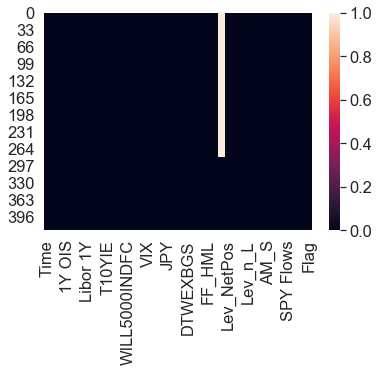

In [94]:
sns.heatmap(data.isnull())

In [95]:
lag = ['AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S',
       'Lev_L', 'Lev_S','Lev_NetPos']

In [96]:
data[lag] = data[lag].shift(1)
test_data[lag] = test_data[lag].shift(1)

In [97]:
data.drop(['Signal', 'Flag'], axis = 1, inplace = True)
test_data.drop(['Signal', 'Flag'], axis = 1, inplace = True)

In [98]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [99]:
p = len(data.columns)
p

38

In [100]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume'],
      dtype='object')

## Baseline

In [101]:
time_periods = data['Time']
X_train = data.iloc[:,2:p-2]
y_train = data.iloc[:,1]

X_test = test_data.iloc[:,2:p-2]
y_test = test_data.iloc[:,1]

#### Standardization

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#### Ridge

In [103]:
from sklearn.linear_model import Ridge, RidgeCV
ridge = RidgeCV(alphas = np.linspace(0.1,1,100))
ridge.fit(X_train_std, y_train)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]))

In [104]:
ridge.alpha_

0.1

MAE on training set: 6079.25
MAE on testing set: 12546.60


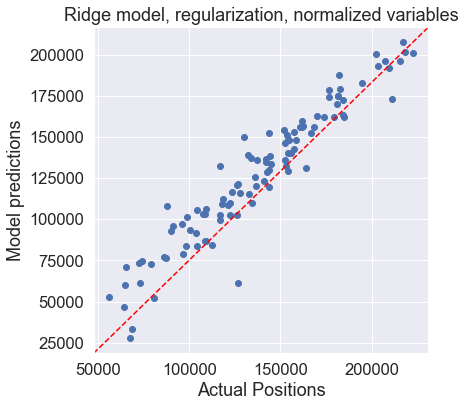

In [105]:
y_pred = ridge.predict(X_train_std)
mae = mean_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f}'
y_pred = ridge.predict(X_test_std)
mae = mean_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f}'

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.title('Ridge model, regularization, normalized variables')
plt.ylabel('Model predictions')
plt.xlabel('Actual Positions')
print(string_score)

(-0.05244627058970836,
 1.3213716823838757,
 -61632.6278922606,
 55949.30484488314)

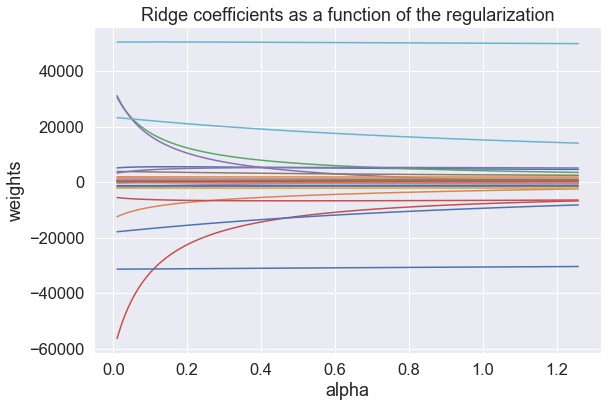

In [106]:
clf = Ridge()

coefs = []
errors = []

alphas = np.logspace(-2,0.1,100)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train_std, y_train)
    coefs.append(clf.coef_)
    

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


#### Lasso

In [107]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(max_iter = 10000, alphas = np.logspace(0.1,3,100))
lasso.fit(X_train_std, y_train)

LassoCV(alphas=array([   1.25892541,    1.34676844,    1.44074081,    1.54127022,
          1.64881419,    1.76386217,    1.88693776,    2.0186011 ,
          2.1594514 ,    2.3101297 ,    2.47132176,    2.64376119,
          2.82823278,    3.0255761 ,    3.23668929,    3.46253315,
          3.70413553,    3.96259601,    4.23909088,    4.53487851,
          4.85130507,    5.18981068,    5.55193591,    5.93932887,
          6.35375264,    6.79709332,    7.27136862,    7.77873705,
          8.32150772,    8.90215085,    9....
        161.84187792,  173.13458823,  185.21526088,  198.1388769 ,
        211.96425366,  226.75431259,  242.57636554,  259.50242114,
        277.60951248,  296.98004774,  317.70218523,  339.87023462,
        363.58508612,  388.9546697 ,  416.09444628,  445.12793318,
        476.1872663 ,  509.41380148,  544.95875783,  582.98390597,
        623.66230422,  667.17908629,  713.7323038 ,  763.53382765,
        816.81031231,  873.8042273 ,  934.77496078, 1000.        ]),

In [108]:
np.log(lasso.alpha_)

5.288968183301474

In [109]:
X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]

Index(['T10Y3M', 'T10Y2Y', 'T10YIE', 'SPX', 'GOLD_price', 'VIX', 'GVZCLS',
       'JPY', 'EUR', 'FF_Mkt', 'FF_SMB', 'FF_MOM', 'Lev_n_S', 'AM_L', 'AM_S',
       'Lev_L', 'SPY Flows'],
      dtype='object')

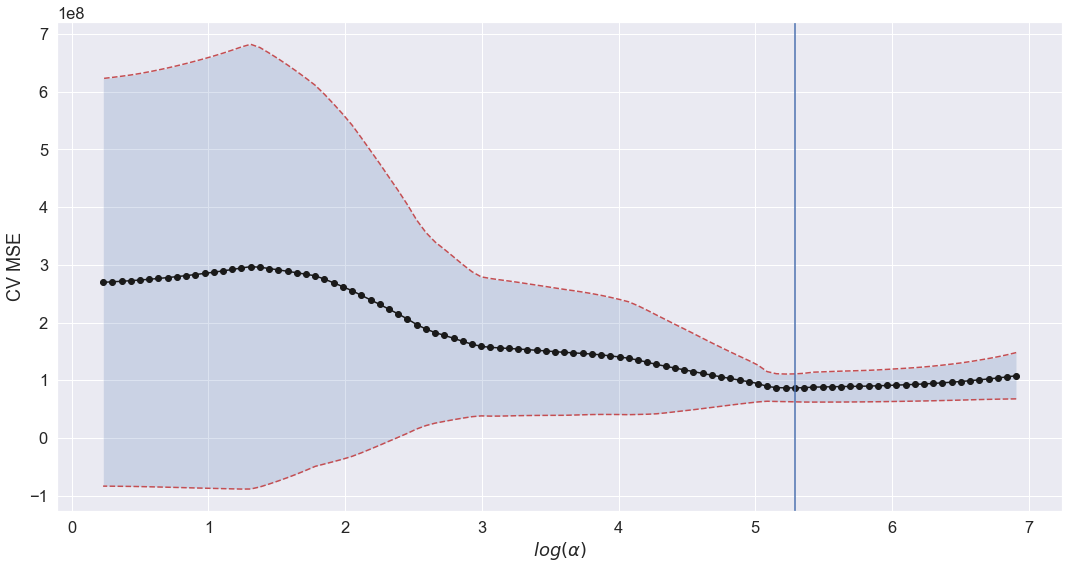

In [110]:
alpha_range = lasso.alphas_
mse_values = lasso.mse_path_.mean(axis = 1)
sd_values = lasso.mse_path_.std(axis = 1)
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range), mse_values ,"ko-")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.axvline(np.log(lasso.alpha_))
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

## Study Positioning Dynamics

In [111]:
data['dNetPos_shift'] = data['AM_NetPos'].diff().shift(1)
test_data['dNetPos_shift'] = test_data['AM_NetPos'].diff().shift(1)
data['dNetPos'] = data['AM_NetPos'].diff()
test_data['dNetPos'] = test_data['AM_NetPos'].diff()
data['dNetPos_log_rate'] = np.log(data['AM_NetPos']).diff() 
test_data['dNetPos_log_rate'] = np.log(test_data['AM_NetPos']).diff()

In [112]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [113]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'dNetPos_shift', 'dNetPos', 'dNetPos_log_rate'],
      dtype='object')

In [114]:
p = len(data.columns)
p

41

In [115]:
# For training purpose
time_periods = data['Time']
X_train = data.iloc[:,2:p-2]
y_train = data.iloc[:,-2]
y_train_gr = data.iloc[:,-1]
#y_train_alter = weekly_data.iloc[:,2]
X_test = test_data.iloc[:,2:p-2]
y_test = test_data.iloc[:,-2]
y_test_gr = test_data.iloc[:,-1]
#y_test_alter = test_weekly_data.iloc[:,2]

In [116]:
data['year'] = pd.DatetimeIndex(data['Time']).year

In [117]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'dNetPos_shift', 'dNetPos', 'dNetPos_log_rate', 'year'],
      dtype='object')

### Modeling

For starters, we want to try some basic regression-based model: ridge, lasso, GAM.

#### Standardization

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [119]:
res_before2020 = pd.DataFrame(index = ['Ridge', 'Lasso', 'Random Forest'], columns = ['MSE', 'MAE'])
res_2020 = pd.DataFrame(index = ['Ridge', 'Lasso', 'Random Forest'], columns = ['MSE', 'MAE'])

#### Rolling Test Machine

In [120]:
def rolling_pred(X_train, X_test, model, cv_splitter):
    '''
    return rolling prediction
    '''
    

In [121]:
ind_year2020 = np.where(test_data['Time'] > "2020-01-01")[0][0]

#### Ridge

In [122]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [123]:
tscv = TimeSeriesSplit(n_splits = 5)

In [124]:
ridge = RidgeCV(alphas = np.logspace(0.1,2,50), cv = tscv)
ridge.fit(X_train_std, y_train)

RidgeCV(alphas=array([  1.25892541,   1.37649776,   1.50505032,   1.64560853,
         1.79929362,   1.96733152,   2.15106266,   2.35195264,
         2.57160393,   2.8117687 ,   3.0743627 ,   3.36148062,
         3.67541279,   4.01866341,   4.39397056,   4.80432804,
         5.25300922,   5.74359321,   6.27999335,   6.86648845,
         7.50775694,   8.20891416,   8.97555318,   9.81378942,
        10.73030941,  11.73242415,  12.82812743,  14.02615957,
        15.33607719,  16.76832937,  18.33434107,  20.04660423,
        21.91877742,  23.96579481,  26.20398529,  28.6512027 ,
        31.32696828,  34.25262639,  37.45151475,  40.94915062,
        44.77343434,  48.95487189,  53.52681823,  58.52574339,
        63.99152336,  69.96775821,  76.50211983,  83.64673228,
        91.4585875 , 100.        ]),
        cv=TimeSeriesSplit(max_train_size=None, n_splits=5))

In [125]:
ridge.alpha_

69.96775820786503

In [126]:
res_before2020.loc['Ridge', 'MSE'] = mean_squared_error(y_test[:ind_year2020], ridge.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Ridge', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], ridge.predict(X_test_std[:ind_year2020,:]))

In [127]:
res_2020.loc['Ridge', 'MSE'] = mean_squared_error(y_test[ind_year2020:], ridge.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Ridge', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], ridge.predict(X_test_std[ind_year2020:,:]))

#### Lasso

In [128]:
lasso = LassoCV(max_iter = 10000, cv = tscv)
lasso.fit(X_train_std, y_train)

LassoCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5), max_iter=10000)

In [129]:
np.log(lasso.alpha_)

6.086107388229262

In [130]:
alpha_range = lasso.alphas_
mse_values = lasso.mse_path_.mean(axis = 1)
sd_values = lasso.mse_path_.std(axis = 1)

In [131]:
alpha_min_ind = np.where(np.abs(np.log(alpha_range) - np.log(lasso.alpha_)) < 1e-4)[0]
alpha_1se_ind = len(mse_values) - np.searchsorted(mse_values[::-1], mse_values[alpha_min_ind]+sd_values[alpha_min_ind])
alpha_1se = alpha_range[alpha_1se_ind]

In [132]:
# 1se
from sklearn.linear_model import Lasso
lasso_1se = Lasso(alpha = alpha_1se, max_iter = 10000)
lasso_1se.fit(X_train_std, y_train)

Lasso(alpha=array([4100.71724573]), max_iter=10000)

Test lasso

In [133]:
res_before2020.loc['Lasso', 'MSE'] = mean_squared_error(y_test[:ind_year2020], lasso.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Lasso', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], lasso.predict(X_test_std[:ind_year2020,:]))

In [134]:
res_2020.loc['Lasso', 'MSE'] = mean_squared_error(y_test[ind_year2020:], lasso.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Lasso', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], lasso.predict(X_test_std[ind_year2020:,:]))

Test lasso1se

In [135]:
res_before2020.loc['Lasso1se', 'MSE'] = mean_squared_error(y_test[:ind_year2020], lasso_1se.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Lasso1se', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], lasso_1se.predict(X_test_std[:ind_year2020,:]))

In [136]:
res_2020.loc['Lasso1se', 'MSE'] = mean_squared_error(y_test[ind_year2020:], lasso_1se.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Lasso1se', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], lasso_1se.predict(X_test_std[ind_year2020:,:]))

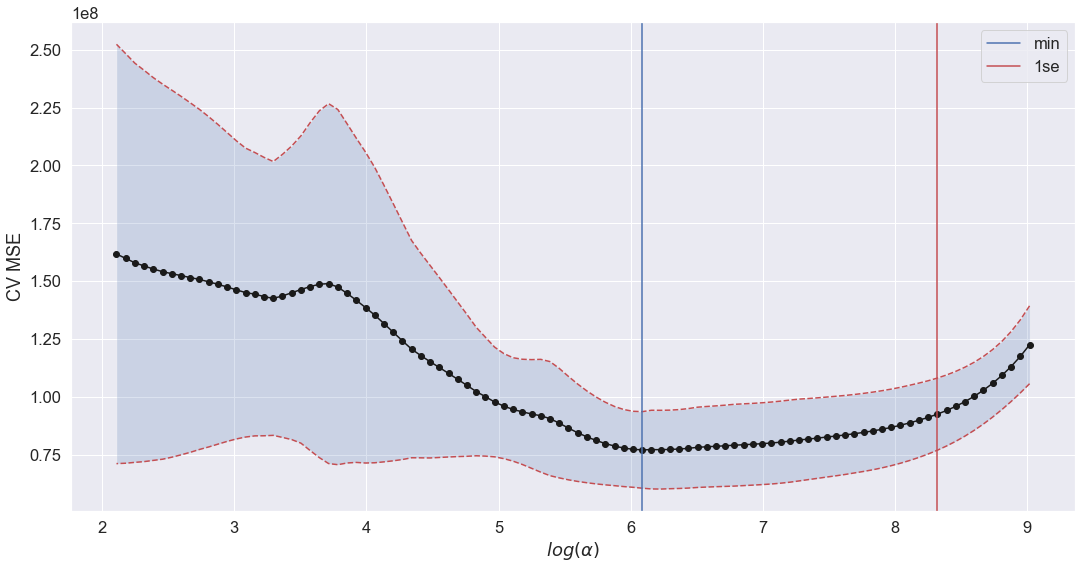

In [137]:
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range), mse_values ,"ko-")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.axvline(np.log(lasso.alpha_), label = 'min')
plt.axvline(np.log(alpha_1se), label = '1se', color = 'r')
plt.legend()
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

__Useful variables selected by LASSO__

In [138]:
X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'FF_SMB', 'AM_S', 'Lev_L',
       'SPY Flows', 'JNK_Volume'],
      dtype='object')

In [139]:
X_train.columns[np.abs(lasso_1se.coef_ - 0) > 1e-4]

Index(['SPX'], dtype='object')

#### RandomForest

In [140]:
X_train_std.shape

(421, 37)

In [141]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, max_features = 'sqrt')
rf.fit(X_train_std, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=20)

In [142]:
res_before2020.loc['Random Forest', 'MSE'] = mean_squared_error(y_test[:ind_year2020], rf.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Random Forest', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], rf.predict(X_test_std[:ind_year2020,:]))

In [143]:
res_2020.loc['Random Forest', 'MSE'] = mean_squared_error(y_test[ind_year2020:], rf.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Random Forest', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], rf.predict(X_test_std[ind_year2020:,:]))

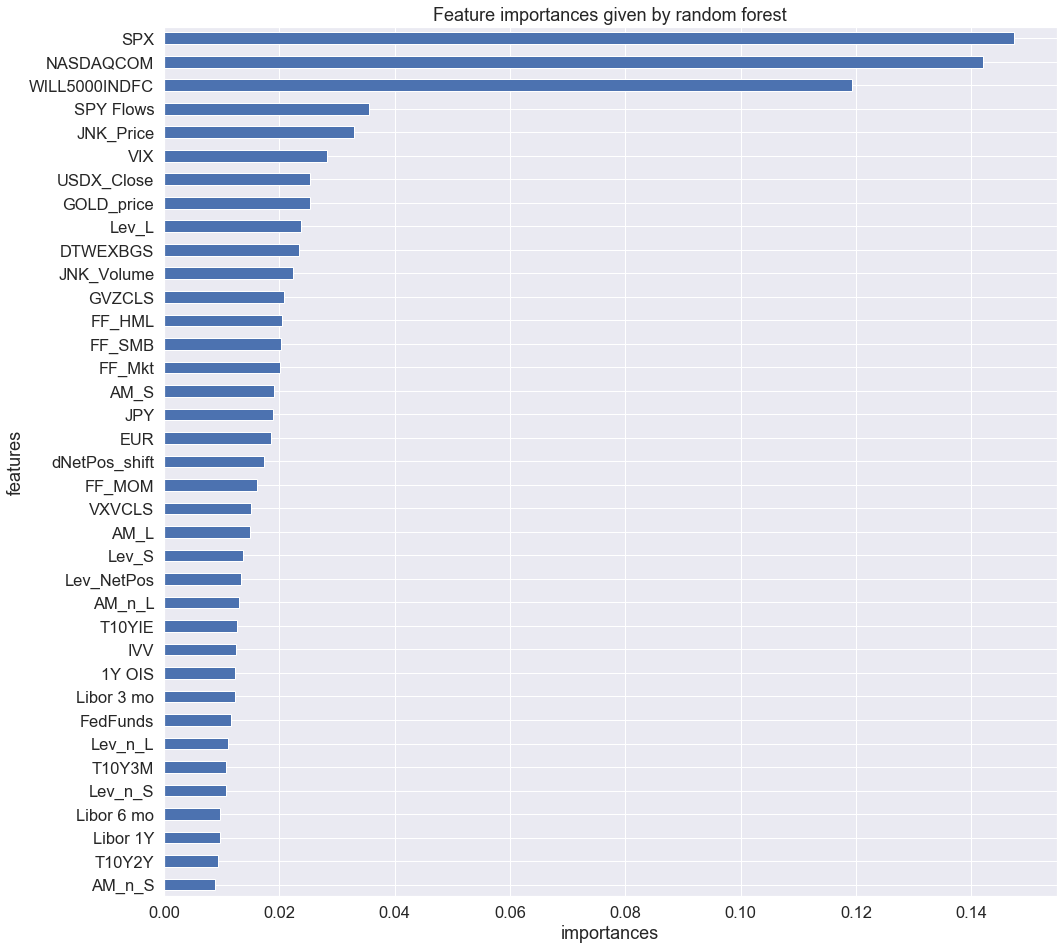

In [144]:
feat_importance = pd.Series(rf.feature_importances_, index = X_train.columns)
sns.set(font_scale = 1.5)
fis = np.argsort(feat_importance)
feat_importance = feat_importance[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

In [145]:
features_all = list(feat_importance.index)
features = list(feat_importance[-10:].index)
X_train_ppd = pd.DataFrame(columns = [])
for i in features_all:
    index = X_train.columns.get_loc(i)
    X_train_ppd[i] = X_train_std[:,index]

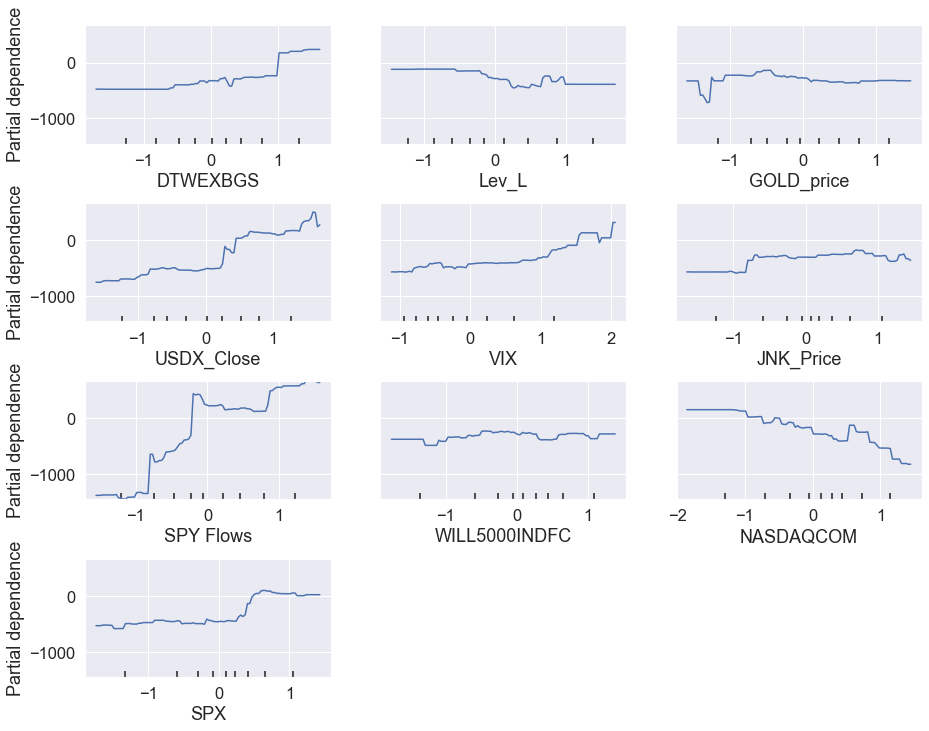

In [146]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(rf, X_train_ppd, features)
fig = plt.gcf()
fig.set_size_inches(15,12)
fig.subplots_adjust(hspace=0.5)

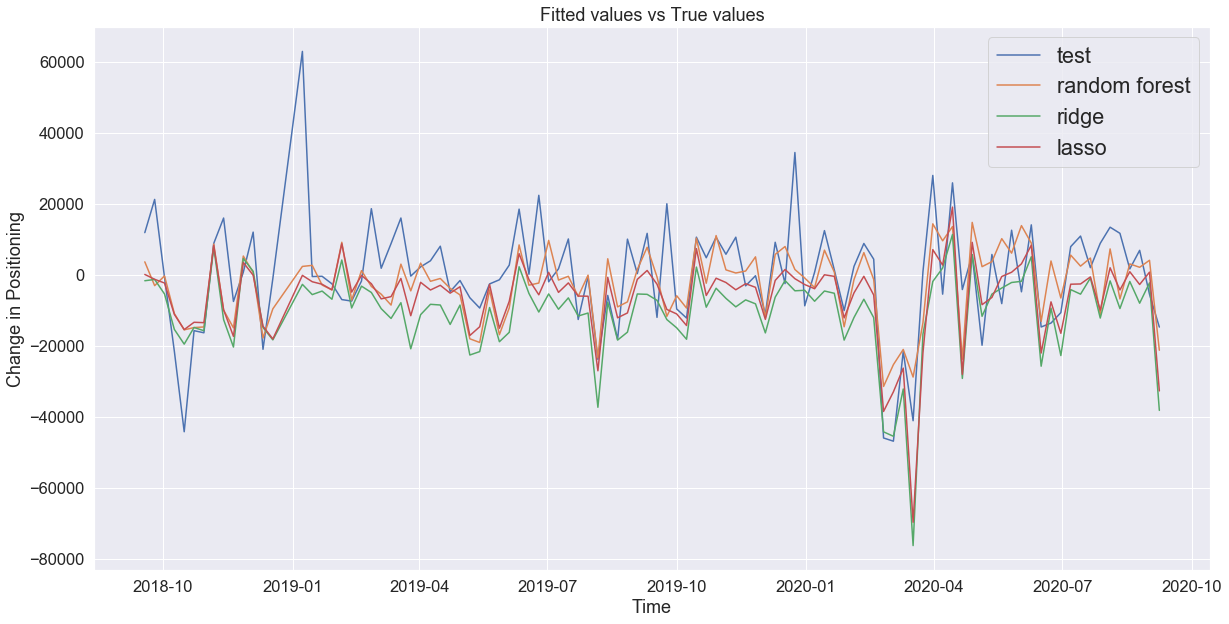

In [147]:
fig = plt.figure(figsize = [20,10])
plt.plot(test_data['Time'], y_test, label = 'test')
plt.plot(test_data['Time'], rf.predict(X_test_std), label = 'random forest')
plt.plot(test_data['Time'], ridge.predict(X_test_std), label = 'ridge')
plt.plot(test_data['Time'], lasso.predict(X_test_std), label = 'lasso')
plt.xlabel("Time")
plt.ylabel("Change in Positioning")
plt.title('Fitted values vs True values')
plt.legend(fontsize = 'large')

In [148]:
res_before2020

,MSE,MAE
Ridge,2.79539e+08,12642.5
Lasso,2.07743e+08,9961.85
Random Forest,1.89071e+08,9216.46
Lasso1se,1.86155e+08,9354.76


In [149]:
res_2020

,MSE,MAE
Ridge,2.16373e+08,12270.4
Lasso,1.48984e+08,10332.8
Random Forest,1.32943e+08,9346.24
Lasso1se,1.37881e+08,9197.92


#### Random Forest With Tuning

In [150]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
p = X_train_std.shape[1]
param_grids_random = {
    'max_depth': [2, 3, 5, 6, 8, 10],
    'n_estimators': [2, 5, 10, 15, 20, 25, 30]
}

In [151]:
random_grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grids_random, scoring='neg_mean_absolute_error', cv=tscv, n_iter = 30).fit(X_train_std, y_train)

In [152]:
random_grid_search.best_params_

{'n_estimators': 25, 'max_depth': 6}

By random grid search, the best parameter for random forest is {'n_estimators': 20, 'max_depth': 6}

In [153]:
res_before2020.loc['Random Forest Tuning', 'MSE'] = mean_squared_error(y_test[:ind_year2020], random_grid_search.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Random Forest Tuning', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], random_grid_search.predict(X_test_std[:ind_year2020,:]))

In [154]:
res_2020.loc['Random Forest Tuning', 'MSE'] = mean_squared_error(y_test[ind_year2020:], random_grid_search.predict(X_test_std)[ind_year2020:])
res_2020.loc['Random Forest Tuning', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], random_grid_search.predict(X_test_std)[ind_year2020:])

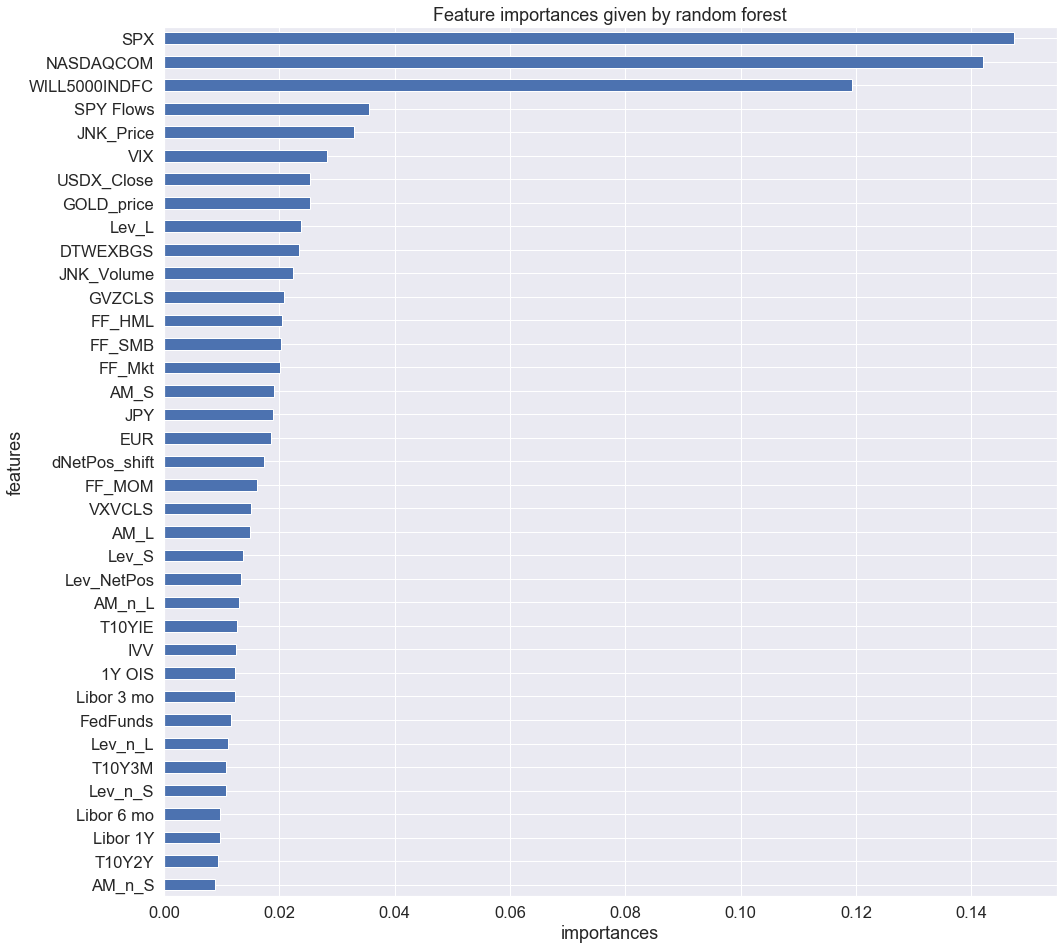

In [155]:
sns.set(font_scale = 1.5)
feat_importance1 = pd.Series(random_grid_search.best_estimator_.feature_importances_, index = X_train.columns)
fis = np.argsort(feat_importance1)
feat_importance1 = feat_importance1[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

In [156]:
features_all1 = list(feat_importance1.index)
features1 = list(feat_importance1[-10:].index)
X_train_ppd1 = pd.DataFrame(columns = [])
for i in features_all1:
    index1 = X_train.columns.get_loc(i)
    X_train_ppd1[i] = X_train_std[:,index1]

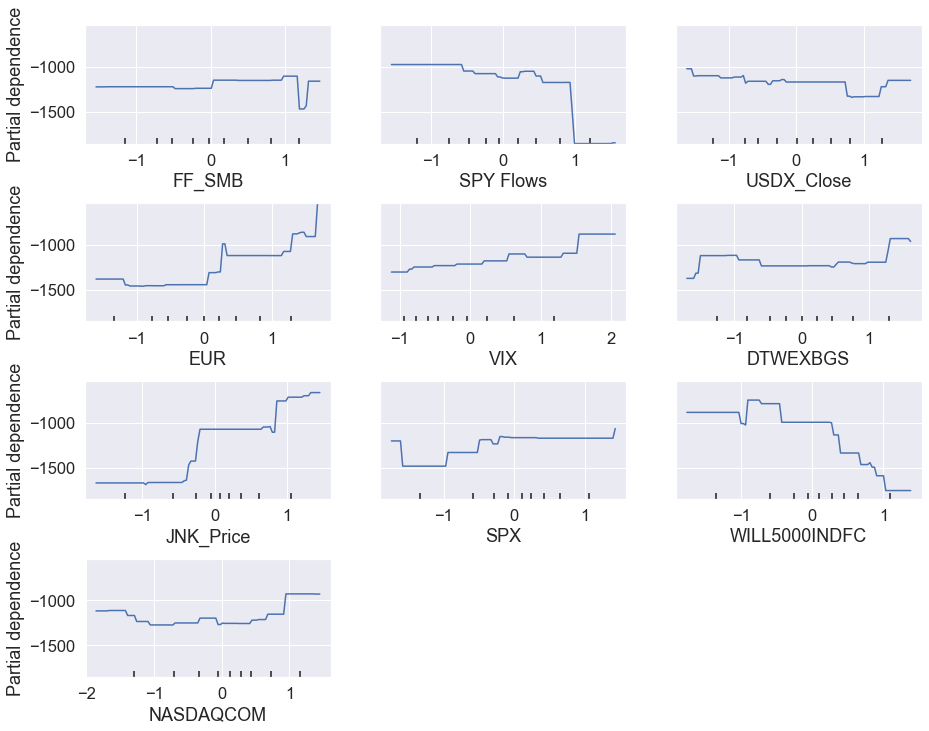

In [157]:
plot_partial_dependence(random_grid_search, X_train_ppd1, features1)
fig = plt.gcf()
fig.set_size_inches(15,12)
fig.subplots_adjust(hspace=0.5)

Text(0, 0.5, 'Fitted Data')

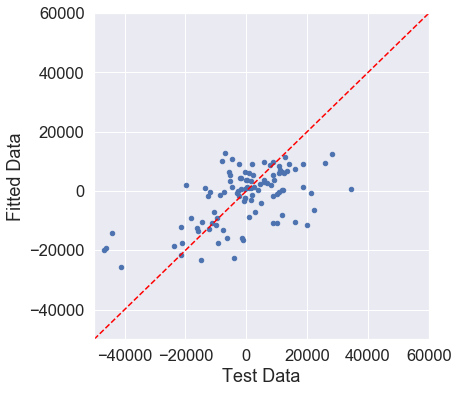

In [158]:
fig = plt.figure(figsize = [6,6])
ax = fig.subplots(1,1)
ax.scatter(y_test, random_grid_search.predict(X_test_std), s = 20)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.set(xlim=(-50000, 60000), ylim=(-50000, 60000))
ax.set_xlabel("Test Data")
ax.set_ylabel("Fitted Data")

We can see our model tends to overestimate the change in positioning data.

#### Elastic Net

In [159]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(l1_ratio = np.linspace(0.4, 1, 10), alphas = np.logspace(1,2,20, base = np.exp(1)), max_iter = 10000, cv= tscv)
elastic.fit(X_train_std, y_train)

ElasticNetCV(alphas=array([2.71828183, 2.86518116, 3.02001911, 3.18322469, 3.35525011,
       3.53657199, 3.72769274, 3.92914189, 4.1414776 , 4.36528819,
       4.60119379, 4.84984802, 5.11193983, 5.38819541, 5.67938019,
       5.98630095, 6.30980809, 6.65079796, 7.01021535, 7.3890561 ]),
             cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             l1_ratio=array([0.4       , 0.46666667, 0.53333333, 0.6       , 0.66666667,
       0.73333333, 0.8       , 0.86666667, 0.93333333, 1.        ]),
             max_iter=10000)

In [160]:
np.log(elastic.alpha_)

1.0526315789473684

In [161]:
elastic.l1_ratio_

0.8666666666666667

In [162]:
res_before2020.loc['Elastic Net', 'MSE'] = mean_squared_error(y_test[:ind_year2020], elastic.predict(X_test_std)[:ind_year2020])
res_before2020.loc['Elastic Net', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], elastic.predict(X_test_std)[:ind_year2020])

In [163]:
res_2020.loc['Elastic Net', 'MSE'] = mean_squared_error(y_test[ind_year2020:], elastic.predict(X_test_std)[ind_year2020:])
res_2020.loc['Elastic Net', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], elastic.predict(X_test_std)[ind_year2020:])

In [164]:
X_train.columns[np.abs(elastic.coef_ - 0) > 1e-4]

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y',
       'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'dNetPos_shift'],
      dtype='object')

#### Examine those important variables

In [166]:
lasso_pick = X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]
lasso_pick

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'FF_SMB', 'AM_S', 'Lev_L',
       'SPY Flows', 'JNK_Volume'],
      dtype='object')

In [167]:
rf_pick = feat_importance[-10:].index
rf_pick

Index(['DTWEXBGS', 'Lev_L', 'GOLD_price', 'USDX_Close', 'VIX', 'JNK_Price',
       'SPY Flows', 'WILL5000INDFC', 'NASDAQCOM', 'SPX'],
      dtype='object')

In [168]:
common_pick = set(rf_pick).intersection(set(lasso_pick))
common_pick

{'GOLD_price', 'Lev_L', 'SPX', 'SPY Flows', 'VIX'}

In [169]:
X_train.columns

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M',
       'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'dNetPos_shift'],
      dtype='object')

In [170]:
pickout = np.arange(len(X_train.columns))[np.isin(X_train.columns, np.array([i for i in common_pick]))]
pickout

array([ 9, 12, 13, 31, 33])

In [171]:
X_train.columns[pickout]

Index(['SPX', 'GOLD_price', 'VIX', 'Lev_L', 'SPY Flows'], dtype='object')

In [172]:
res_before2020

,MSE,MAE
Ridge,2.79539e+08,12642.5
Lasso,2.07743e+08,9961.85
Random Forest,1.89071e+08,9216.46
Lasso1se,1.86155e+08,9354.76
Random Forest Tuning,1.87486e+08,9487.56
Elastic Net,2.30469e+08,10956.5


In [86]:
X_train_sel = X_train.iloc[:,pickout]
X_test_sel = X_test.iloc[:,pickout]

In [87]:
X_train_sel.columns = ['SPX', 'VIX', 'FF_SMB', 'FF_Mkt', 'SPYFlows']
X_test_sel.columns = ['SPX', 'VIX', 'FF_SMB', 'FF_Mkt', 'SPYFlows']

ValueError: Length mismatch: Expected axis has 4 elements, new values have 5 elements

In [ ]:
r_data_train = pd.concat([X_train_sel, y_train], axis = 1)
r_data_test = pd.concat([X_test_sel, y_test], axis = 1)

In [ ]:
import rpy2
%reload_ext rpy2.ipython

In [ ]:
%%R -i r_data_train -i r_data_test
head(r_data_train)

In [ ]:
%%R
library(mgcv)
fit = gam(dNetPos ~ s(SPX) + s(VIX) + s(FF_SMB) + s(FF_Mkt) + s(SPYFlows), data=r_data_train, 
          method = "REML", select = TRUE)
plot(fit)

In [ ]:
%%R 
summary(fit)

In [ ]:
%%R
library(mgcv)
library(sam)

In [ ]:
%%R -o gam_predict
gam_predict = predict(fit, newdata=r_data_test)

In [ ]:
res_before2020.loc['GAM', 'MSE'] = mean_squared_error(y_test[:ind_year2020], gam_predict[:ind_year2020])
res_before2020.loc['GAM', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], gam_predict[:ind_year2020])

In [ ]:
res_before2020

In [ ]:
res_2020.loc['GAM', 'MSE'] = mean_squared_error(y_test[ind_year2020:], gam_predict[ind_year2020:])
res_2020.loc['GAM', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], gam_predict[ind_year2020:])

In [ ]:
res_2020

__Abandoned__

In [ ]:
from pygam import LinearGAM, s,l,f,te
gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)).gridsearch(X_train_std_sel, y_train, lam = [np.logspace(-2, 3, 5)]*6)

In [ ]:
import pickle
with open('gam_model.pkl', 'wb') as fw:
    pickle.dump(gam, fw, 0)

In [ ]:
fig = plt.figure(figsize = [16,8])
sns.set(font_scale = 1)
axs = fig.subplots(2, len(pickout)//2)
titles = X_train.columns[pickout]

for i in range(len(pickout)):
    Xfake = gam.generate_X_grid(term = i)
    #Xback = scaler.inverse_transform(Xfake)
    pdep, confi = gam.partial_dependence(term = i, X= Xfake, width=.95)

    axs[i//3, i%3].plot(Xfake[:, i], pdep)
    #ax.plot(XX[:, i], confi[0], c='r', ls='--')
    axs[i//3, i%3].set_title(titles[i])

plt.show()

In [ ]:
benchmark_res.loc['GAM', 'MSE'] = mean_squared_error(y_test, gam.predict(X_test_std_sel))
benchmark_res.loc['GAM', 'MAE'] = mean_absolute_error(y_test, gam.predict(X_test_std_sel))

In [ ]:
benchmark_res

In [ ]:
fig = plt.figure(figsize = [6,6])
ax = fig.subplots(1,1)
ax.scatter(y_test, gam.predict(X_test_std_sel), s = 20)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.set_xlabel("Test Data")
ax.set_ylabel("Fitted Data")
ax.set(xlim=(-50000, 60000), ylim=(-50000, 60000))

In [ ]:
fig = plt.figure(figsize = [20,10])
sns.set(font_scale = 1.5)
plt.plot(test_data['Time'], y_test, label = 'test')
plt.plot(test_data['Time'], gam.predict(X_test_std_sel), label = 'GAM')
plt.plot(test_data['Time'], random_grid_search.predict(X_test_std), label = 'RF Tuning')
plt.plot(test_data['Time'], lasso_1se.predict(X_test_std), label = 'lasso1se')
plt.xlabel("Time")
plt.ylabel("Change in Positioning")
plt.title('Fitted values vs True values')
plt.legend(fontsize = 'large')

In [ ]:
np.abs(y_test).mean()

In [ ]:
np.abs(y_test).std()

In [ ]:
fig = plt.figure(figsize = [16,8])
plt.plot(np.log(data.AM_NetPos))

In [ ]:
fig = plt.figure(figsize = [24,8])
plt.plot(data.AM_NetPos.diff())